In [1]:
! pip install pandas textblob googletrans==4.0.0-rc1 nltk contractions emoji

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=8007f67b48070bef38c42bdc9d8fb63141bf45c222b23361f1b29

In [7]:
import nltk
from nltk.corpus import opinion_lexicon, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import pandas as pd
import re, contractions, emoji
from string import punctuation
from googletrans import Translator
from nltk.util import bigrams
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure necessary NLTK data is available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize necessary objects
translator = Translator()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# Translation function
def translate_to_english(text, src_lang):
    if src_lang != 'en':
        try:
            translated = translator.translate(text, src=src_lang, dest='en')
            return translated.text
        except Exception as e:
            print(f"Translation error: {e}")
            return text
    else:
        return text

# Preprocess function
def preprocess(text, src_lang):
    # Translate to English
    translated_text = translate_to_english(text, src_lang)
    # Lowercasing
    translated_text = translated_text.lower()
    # Expand contractions
    text = contractions.fix(translated_text)
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Removing punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    # Removing numeric values
    cleaned_text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = word_tokenize(cleaned_text)
    # Lemmatization
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens
    processed_text = ' '.join(lemma)

    return processed_text

# Load the data
df = pd.read_excel('/kaggle/input/dataset/hotel_reviews.xlsx')

# Apply the preprocess function to the dataframe
df['Preprocessed_Text'] = df.apply(lambda row: preprocess(row['review'], row['language']), axis=1)

# Map the sentiment values
sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

# Drop the review and language columns
df = df.drop(columns=['review', 'language'])

# Save the processed data to a new CSV file
output_file_path = 'preprocessed_hotel_reviews.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8')

# **Traditional Machine Learning**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the preprocessed data
#file_path = '/kaggle/working/preprocessed_hotel_reviews.csv'
file_path = '/content/preprocessed_hotel_reviews.csv'
data = pd.read_csv(file_path)

# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Preprocessed_Text'])
target = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [10]:
# Initialize the classifiers
classifiers = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

Results for SVM:
Accuracy: 0.8611111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       1.00      0.83      0.91        35
           2       0.76      0.91      0.83        32

    accuracy                           0.86       108
   macro avg       0.87      0.86      0.86       108
weighted avg       0.87      0.86      0.86       108



Results for Random Forest:
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       1.00      0.83      0.91        35
           2       0.76      0.81      0.79        32

    accuracy                           0.83       108
   macro avg       0.85      0.83      0.84       108
weighted avg       0.85      0.83      0.84       108



Results for Logistic Regression:
Accuracy: 0.8148148148148148
Classification Report:
 

Results for SVM:
Accuracy: 0.8611111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       1.00      0.83      0.91        35
           2       0.76      0.91      0.83        32

    accuracy                           0.86       108
   macro avg       0.87      0.86      0.86       108
weighted avg       0.87      0.86      0.86       108



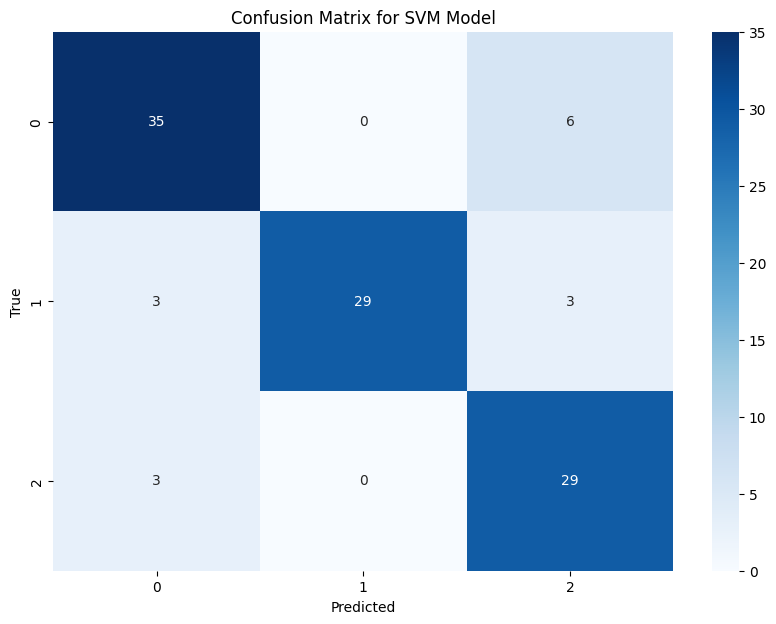

In [11]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print the results
print("Results for SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [12]:
# Preprocess function
def preprocess(text, src_lang='auto'):
    print(f"Original text: {text}")

    # Translate to English
    translated_text = translate_to_english(text, src_lang)
    print(f"Translated text: {translated_text}")

    # Lowercasing
    translated_text = translated_text.lower()
    print(f"Lowercased text: {translated_text}")

    # Expand contractions
    text = contractions.fix(translated_text)
    print(f"Expanded contractions: {text}")

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    print(f"Removed emojis: {text}")

    # Removing punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    print(f"Removed punctuation: {text}")

    # Removing numeric values
    cleaned_text = re.sub(r'\d+', '', text)
    print(f"Removed numeric values: {cleaned_text}")

    # Tokenization
    tokens = word_tokenize(cleaned_text)
    print(f"Tokenized text: {tokens}")

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    print(f"Lemmatized text: {tokens}")

    return ' '.join(tokens)

# Function to classify new text
def classify_new_text(text, src_lang='auto'):
    processed_text = preprocess(text, src_lang)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = svm_model.predict(vectorized_text)
    return prediction

# Example texts for classification
texts = [
    "The hotel was fantastic! The room was clean and the staff were very friendly.",
    "I had a terrible experience. The room was dirty and the service was awful.",
    "Kakitangan yang amat mesra",
    "服务很好。",
    "早餐不好吃。",
    "The stay was okay, nothing special but nothing terrible either."
]

# Classify the example texts
for text in texts:
    sentiment = classify_new_text(text)
    print(f"Predicted Sentiment: {sentiment[0]}\n")

Original text: The hotel was fantastic! The room was clean and the staff were very friendly.
Translated text: The hotel was fantastic! The room was clean and the staff were very friendly.
Lowercased text: the hotel was fantastic! the room was clean and the staff were very friendly.
Expanded contractions: the hotel was fantastic! the room was clean and the staff were very friendly.
Removed emojis: the hotel was fantastic! the room was clean and the staff were very friendly.
Removed punctuation: the hotel was fantastic the room was clean and the staff were very friendly
Removed numeric values: the hotel was fantastic the room was clean and the staff were very friendly
Tokenized text: ['the', 'hotel', 'was', 'fantastic', 'the', 'room', 'was', 'clean', 'and', 'the', 'staff', 'were', 'very', 'friendly']
Lemmatized text: ['the', 'hotel', 'wa', 'fantastic', 'the', 'room', 'wa', 'clean', 'and', 'the', 'staff', 'were', 'very', 'friendly']
Predicted Sentiment: 2

Original text: I had a terrible 

# **Transformer Model - ALBERT**

In [ ]:
!pip install transformers torch accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 9.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AlbertForSequenceClassification, AlbertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set seed for reproducibility
import random
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Load the preprocessed data
file_path = '/kaggle/working/preprocessed_hotel_reviews.csv'
data = pd.read_csv(file_path)

# Define the ALBERT tokenizer
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize the data
def tokenize_data(texts, labels, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_data = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0), torch.tensor(labels)

# Prepare the data
texts = data['Preprocessed_Text'].tolist()
labels = data['sentiment'].apply(lambda x: 0 if x == 'negative' else (1 if x == 'neutral' else 2)).tolist()
input_ids, attention_masks, labels = tokenize_data(texts, labels, tokenizer)

# Split the data into training and testing sets
train_inputs, test_inputs, train_labels, test_labels, train_masks, test_masks = train_test_split(
    input_ids, labels, attention_masks, test_size=0.3, random_state=42)

batch_size = 16

# Create the DataLoader for training set
train_data = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for test set
test_data = TensorDataset(test_inputs, test_masks, torch.tensor(test_labels))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Load the ALBERT model
model = AlbertForSequenceClassification.from_pretrained(
    'albert-base-v2',
    num_labels=3,  # Number of classes for the classification task (negative, neutral, positive)
    output_attentions=False,
    output_hidden_states=False
)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training settings
epochs = 10
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training loop with early stopping based on validation loss
best_validation_loss = float('inf')
patience = 3
no_improvement_counter = 0
model_save_path = '/kaggle/working/best_albert_model.pth'

for epoch_i in range(epochs):
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch

        optimizer.zero_grad()

        outputs = model(b_input_ids,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to prevent exploding gradients

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Epoch {epoch_i + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}')

    # Validation
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    avg_val_loss = total_eval_loss / len(test_dataloader)

    print(f'Validation Accuracy: {avg_val_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Early stopping based on validation loss
    if avg_val_loss < best_validation_loss:
        best_validation_loss = avg_val_loss
        no_improvement_counter = 0
        # Save the model when it improves
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'epoch': epoch_i,
            'best_validation_loss': best_validation_loss
        }, model_save_path)
        print(f'Model saved to {model_save_path}')
    else:
        no_improvement_counter += 1

    if no_improvement_counter >= patience:
        print(f'No improvement for {patience} epochs. Early stopping...')
        break

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/tmp/ipykernel_34/2059710493.py:56: UserWarning: To copy construct from a tensor, it is recommended

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10, Train Loss: 1.0207
Validation Accuracy: 0.7917, Validation Loss: 0.8088
Model saved to /kaggle/working/best_albert_model.pth
Epoch 2/10, Train Loss: 0.6203
Validation Accuracy: 0.9554, Validation Loss: 0.3944
Model saved to /kaggle/working/best_albert_model.pth
Epoch 3/10, Train Loss: 0.2889
Validation Accuracy: 0.9732, Validation Loss: 0.2099
Model saved to /kaggle/working/best_albert_model.pth
Epoch 4/10, Train Loss: 0.1337
Validation Accuracy: 0.9464, Validation Loss: 0.1987
Model saved to /kaggle/working/best_albert_model.pth
Epoch 5/10, Train Loss: 0.0619
Validation Accuracy: 0.9464, Validation Loss: 0.1967
Model saved to /kaggle/working/best_albert_model.pth
Epoch 6/10, Train Loss: 0.0250
Validation Accuracy: 0.9464, Validation Loss: 0.2237
Epoch 7/10, Train Loss: 0.0138
Validation Accuracy: 0.9464, Validation Loss: 0.2641
Epoch 8/10, Train Loss: 0.0079
Validation Accuracy: 0.9464, Validation Loss: 0.2261
No improvement for 3 epochs. Early stopping...


In [ ]:
# Load the model state dictionary
model_checkpoint = torch.load(model_save_path)

# Save the model checkpoint using joblib
joblib_save_path = '/kaggle/working/best_albert_model_joblib.pkl'
joblib.dump(model_checkpoint, joblib_save_path)

print(f'Model saved to {joblib_save_path}')

Model saved to /kaggle/working/best_albert_model_joblib.pkl


              precision    recall  f1-score   support

    negative       0.91      1.00      0.95        41
     neutral       0.94      0.94      0.94        35
    positive       1.00      0.88      0.93        32

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



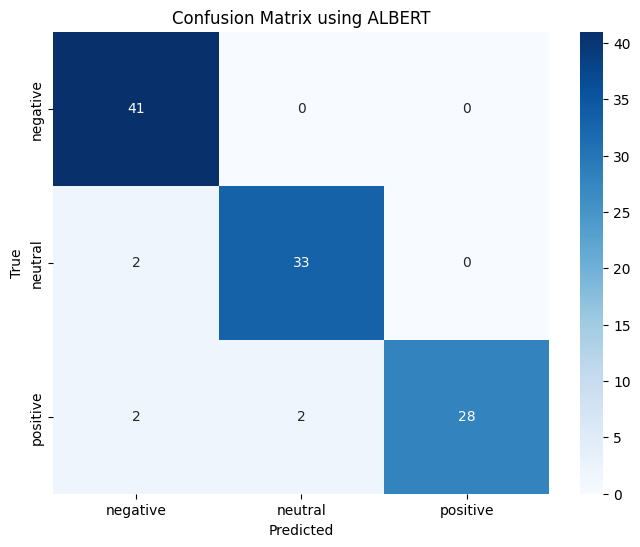

In [ ]:
# Evaluation on test set
model.eval()
predictions, true_labels = [], []

for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids,
                        attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

# Print classification report and confusion matrix
print(classification_report(true_labels, predictions, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2]))

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=[0, 1, 2])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using ALBERT')
plt.show()

# **Transformer Model - BERT**

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Set seed for reproducibility
import random
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Load the preprocessed data
file_path = '/kaggle/working/preprocessed_hotel_reviews.csv'
data = pd.read_csv(file_path)

# Define the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
def tokenize_data(texts, labels, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_data = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_data['input_ids'])
        attention_masks.append(encoded_data['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0), torch.tensor(labels)

# Prepare the data
texts = data['Preprocessed_Text'].tolist()
labels = data['sentiment'].apply(lambda x: 0 if x == 'negative' else (1 if x == 'neutral' else 2)).tolist()
input_ids, attention_masks, labels = tokenize_data(texts, labels, tokenizer)

# Split the data into training and testing sets
train_inputs, test_inputs, train_labels, test_labels, train_masks, test_masks = train_test_split(
    input_ids, labels, attention_masks, test_size=0.3, random_state=42)

batch_size = 16

# Create the DataLoader for training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Load the BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3, # Number of classes for the classification task (negative, neutral, positive)
    output_attentions=False,
    output_hidden_states=False
)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training settings
epochs = 10
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Function to calculate accuracy
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Training loop with early stopping based on validation loss
best_validation_loss = float('inf')
patience = 3
no_improvement_counter = 0
model_save_path = '/kaggle/working/best_bert_model.pth'

for epoch_i in range(epochs):
    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch

        optimizer.zero_grad()

        outputs = model(b_input_ids,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to prevent exploding gradients

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Epoch {epoch_i + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}')

    # Validation
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    for batch in test_dataloader:
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = model(b_input_ids,
                            attention_mask=b_input_mask,
                            labels=b_labels)

        loss = outputs.loss
        total_eval_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    avg_val_loss = total_eval_loss / len(test_dataloader)

    print(f'Validation Accuracy: {avg_val_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Early stopping based on validation loss
    if avg_val_loss < best_validation_loss:
        best_validation_loss = avg_val_loss
        no_improvement_counter = 0
        # Save the model when it improves
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'epoch': epoch_i,
            'best_validation_loss': best_validation_loss
        }, model_save_path)
        print(f'Model saved to {model_save_path}')
    else:
        no_improvement_counter += 1

    if no_improvement_counter >= patience:
        print(f'No improvement for {patience} epochs. Early stopping...')
        break

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10, Train Loss: 1.0915
Validation Accuracy: 0.3661, Validation Loss: 1.0669
Model saved to /kaggle/working/best_bert_model.pth
Epoch 2/10, Train Loss: 0.9379
Validation Accuracy: 0.7976, Validation Loss: 0.7793
Model saved to /kaggle/working/best_bert_model.pth
Epoch 3/10, Train Loss: 0.6055
Validation Accuracy: 0.9196, Validation Loss: 0.4537
Model saved to /kaggle/working/best_bert_model.pth
Epoch 4/10, Train Loss: 0.3425
Validation Accuracy: 0.9464, Validation Loss: 0.2657
Model saved to /kaggle/working/best_bert_model.pth
Epoch 5/10, Train Loss: 0.1835
Validation Accuracy: 0.9464, Validation Loss: 0.1833
Model saved to /kaggle/working/best_bert_model.pth
Epoch 6/10, Train Loss: 0.1006
Validation Accuracy: 0.9554, Validation Loss: 0.1166
Model saved to /kaggle/working/best_bert_model.pth
Epoch 7/10, Train Loss: 0.0555
Validation Accuracy: 0.9464, Validation Loss: 0.1329
Epoch 8/10, Train Loss: 0.0369
Validation Accuracy: 0.9643, Validation Loss: 0.1194
Epoch 9/10, Train Loss

In [ ]:
# Load the model state dictionary
model_checkpoint = torch.load(model_save_path)

# Save the model checkpoint using joblib
joblib_save_path = '/kaggle/working/best_bert_model_joblib.pkl'
joblib.dump(model_checkpoint, joblib_save_path)

print(f'Model saved to {joblib_save_path}')

Model saved to /kaggle/working/best_bert_model_joblib.pkl


              precision    recall  f1-score   support

    negative       0.91      1.00      0.95        41
     neutral       0.97      0.94      0.96        35
    positive       1.00      0.91      0.95        32

    accuracy                           0.95       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.96      0.95      0.95       108



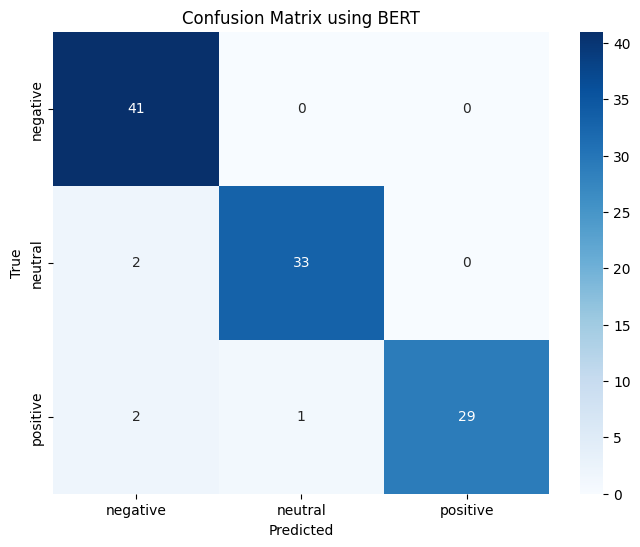

In [ ]:
# Evaluation on test set
model.eval()
predictions, true_labels = [], []

for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

# Print classification report and confusion matrix
print(classification_report(true_labels, predictions, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2]))

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=[0, 1, 2])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using BERT')
plt.show()

# **Text on Deployment**

In [ ]:
import re
import contractions
import emoji
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.base import BaseEstimator, TransformerMixin

# Initialize lemmatizer outside the class
lemmatizer = WordNetLemmatizer()

class PreprocessTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, src_lang='auto'):
        self.src_lang = src_lang
        self.translator = None  # Initialize translator in a method

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.translator is None:
            self.translator = Translator()  # Initialize here to avoid pickling issues
        return [self.preprocess(text) for text in X]

    def preprocess(self, text):
        # Translate to English
        translated_text = self.translate_to_english(text, self.src_lang)

        # Lowercasing
        translated_text = translated_text.lower()

        # Expand contractions
        text = contractions.fix(translated_text)

        # Remove emojis
        text = emoji.replace_emoji(text, replace='')

        # Removing punctuation
        text = text.translate(str.maketrans('', '', punctuation))

        # Removing numeric values
        cleaned_text = re.sub(r'\d+', '', text)

        # Tokenization
        tokens = word_tokenize(cleaned_text)

        # Lemmatization
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        return ' '.join(tokens)

    def translate_to_english(self, text, src_lang):
        if src_lang != 'en':
            try:
                translated = self.translator.translate(text, src=src_lang, dest='en')
                return translated.text
            except Exception as e:
                print(f"Translation error: {e}")
                return text
        else:
            return text

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

# Create the preprocessing pipeline
preprocess_pipeline = Pipeline([
    ('preprocess', PreprocessTransformer())
])

# Example data (replace with your actual data)
texts = ["The hotel was great!", "The room was dirty.", "Service was okay."]

# Fit the pipeline (no fitting needed for preprocessing)
preprocess_pipeline.fit(texts)

# Save the preprocessing pipeline
preprocess_pipeline_save_path = '/kaggle/working/preprocess_pipeline.pkl'
joblib.dump(preprocess_pipeline, preprocess_pipeline_save_path)

print(f'Preprocessing pipeline saved to {preprocess_pipeline_save_path}')

Preprocessing pipeline saved to /kaggle/working/preprocess_pipeline.pkl


In [ ]:
import torch
from sklearn.base import BaseEstimator, TransformerMixin
from transformers import BertForSequenceClassification, BertTokenizer

class BertClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, model_path=None, num_labels=3):
        self.model_path = model_path
        self.num_labels = num_labels
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def fit(self, X, y=None):
        return self  # Model training happens outside this pipeline

    def load_model(self):
        if self.model_path and not self.model:
            self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=self.num_labels)
            self.model.load_state_dict(torch.load(self.model_path)['model_state_dict'])
            self.model.to(self.device)
            self.model.eval()

    def predict(self, X):
        self.load_model()
        inputs = self.tokenizer.batch_encode_plus(
            X,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = inputs['input_ids'].to(self.device)
        attention_masks = inputs['attention_mask'].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_masks)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().numpy()

        return predictions

    def predict_proba(self, X):
        self.load_model()
        inputs = self.tokenizer.batch_encode_plus(
            X,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = inputs['input_ids'].to(self.device)
        attention_masks = inputs['attention_mask'].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_masks)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

        return probabilities

import joblib

# Save the model wrapper separately
model_save_path = '/kaggle/working/best_bert_model.pth'

# Assuming the model is already trained and saved at model_save_path
# Save the model class
bert_model_save_path = '/kaggle/working/bert_model.pkl'
joblib.dump(BertClassifier(model_path=model_save_path), bert_model_save_path)

print(f'BERT model wrapper saved to {bert_model_save_path}')

BERT model wrapper saved to /kaggle/working/bert_model.pkl


In [ ]:
import joblib

# Load the preprocessing pipeline
preprocess_pipeline = joblib.load('/kaggle/working/preprocess_pipeline.pkl')

# Load the model wrapper
bert_model_wrapper = joblib.load('/kaggle/working/bert_model.pkl')

# Set the path to the model weights
bert_model_wrapper.model_path = '/kaggle/working/best_bert_model.pth'

# Ensure the model is loaded
bert_model_wrapper.load_model()

# Example data for prediction
texts = ["The hotel was great.", "The hotel was great","The room was dirty.", "Service was okay.","The service is good but slow.","服务很好"]

# Preprocess the texts
preprocessed_texts = preprocess_pipeline.transform(texts)

# Predict sentiments
predictions = bert_model_wrapper.predict(preprocessed_texts)
print(predictions)  # Output: [2, 0, 1] (or similar, depending on your labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2 2 0 2 1 2]
